# An Initial Analysis
### Importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

### Loading the train dataset and checking its values

In [2]:
water_consumption = pd.read_csv("train.csv")
water_consumption.head(10)

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
5,2013,1,industrial,27,FHMG62751338090488,Installation_zone 2
6,2013,1,industrial,5,APVF78863215212358,Installation_zone 2
7,2013,1,domestic,31,MXWL75757930683403,Installation_zone 2
8,2013,1,industrial,2,NVMY31359391120094,Installation_zone 2
9,2013,1,industrial,0,PZAN37359795617576,Installation_zone 2


In [3]:
water_consumption.describe()

,Year,Month,Consumption
count,329975.000000,329975.00000,329975.000000
mean,2016.774701,6.49955,6.724294
std,2.376551,3.51024,18.589004
min,2013.000000,1.00000,0.000000
25%,2014.000000,3.00000,1.000000
50%,2017.000000,6.00000,5.000000
75%,2019.000000,10.00000,9.000000
max,2020.000000,12.00000,4978.000000


In [4]:
unique_users = water_consumption['Consumer_number'].nunique()

print(f'Total number of users: {unique_users}')

Total number of users: 27632


There is a strange pick on the consumption that we keep at the moment.

<Axes: >

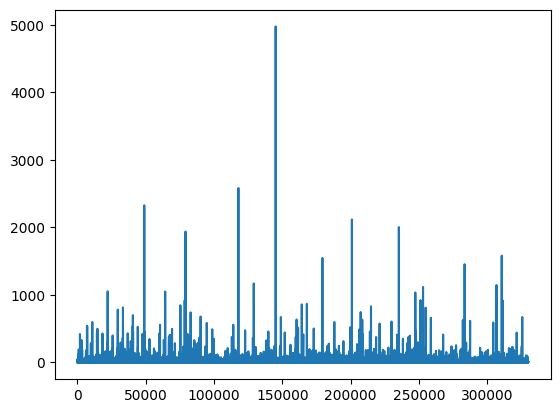

In [5]:
water_consumption.Consumption.plot()

Displaying the quantity of items categorized by consumption type.

<Axes: title={'center': 'Consumer Type'}>

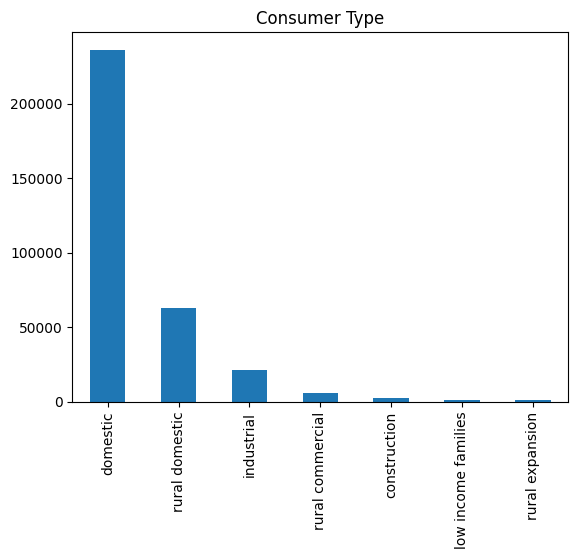

In [6]:
water_consumption.Consumer_type.value_counts().plot(kind='bar', title="Consumer Type")

When we tally the various labels, it becomes evident that the dataset is imbalanced.

**How is the consumption by category?**


In [7]:
water_zone = water_consumption.groupby(['Consumer_type'])
water_zone = water_zone['Consumption'].mean()
water_zone = water_zone.reset_index()

water_zone.head(10)

,Consumer_type,Consumption
0,construction,7.730201
1,domestic,6.810613
2,industrial,11.294819
3,low income families,9.031031
4,rural commercial,6.162967
5,rural domestic,4.898583
6,rural expansion,3.474157


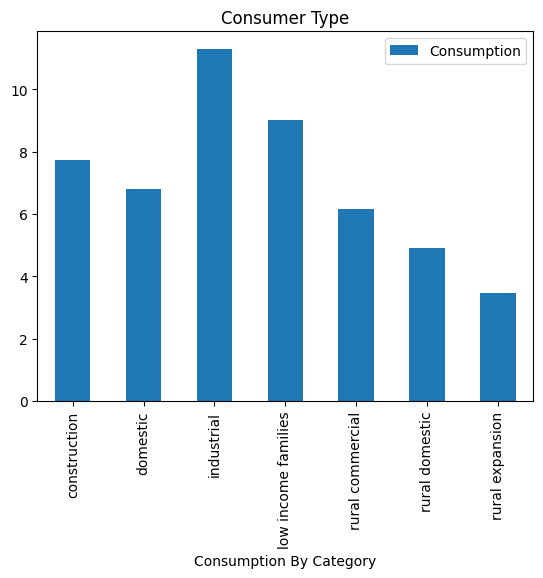

In [8]:
ax = water_zone.plot(kind='bar', title="Consumer Type")
ax = ax.set_xticklabels(water_zone.Consumer_type, rotation=90)

plt.xlabel('Consumption By Category')

plt.show()

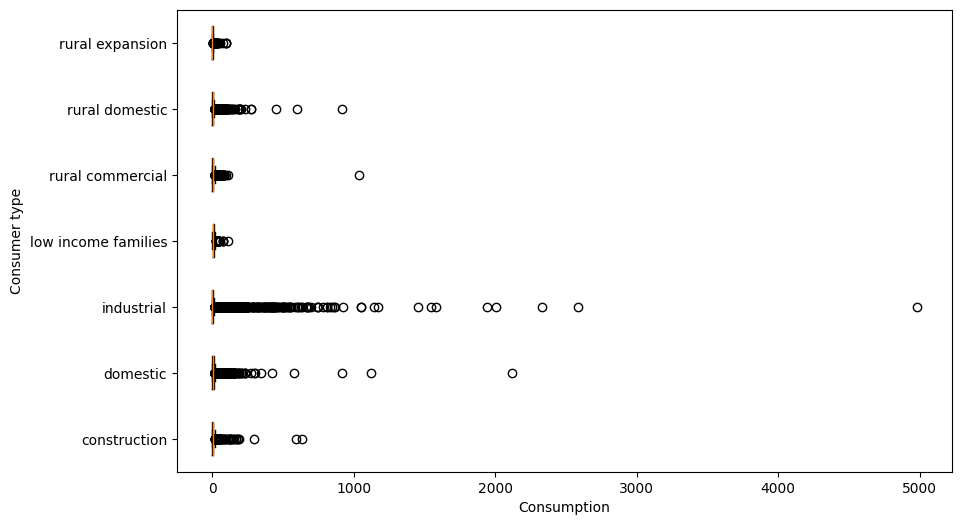

In [9]:
grouped_data = water_consumption.groupby('Consumer_type')['Consumption']

water_consumption_type = [group[1] for group in grouped_data]

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(water_consumption_type, labels=grouped_data.groups.keys(), vert=False)
plt.xlabel('Consumption')
plt.ylabel('Consumer type')
plt.show()

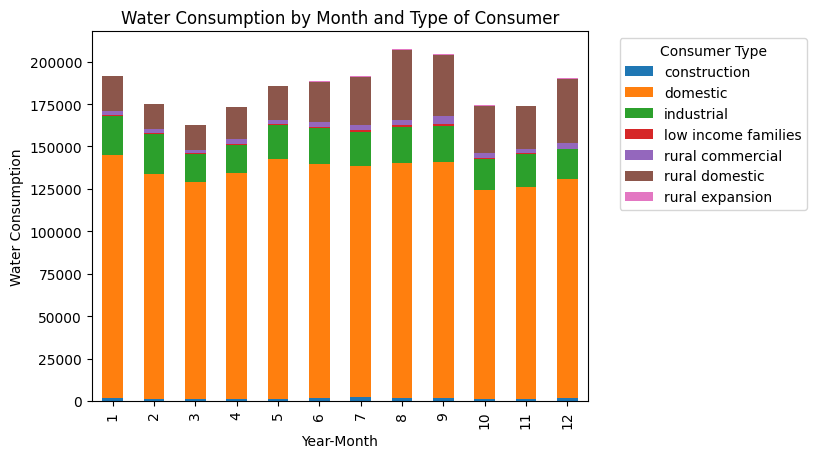

In [10]:
pivot_table = pd.pivot_table(water_consumption, values='Consumption', index=['Month'], columns='Consumer_type', aggfunc='sum', fill_value=0)

fig, ax = plt.subplots()

pivot_table.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Year-Month')
plt.ylabel('Water Consumption')
plt.title('Water Consumption by Month and Type of Consumer')
plt.legend(title='Consumer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The consumption varies significantly depending on the category.

### Consumption on areas

It is interesting to check if every zone is balanced. Also, it is important to know if there are zones that consume more than others.

<Axes: title={'center': 'Installation Zone'}>

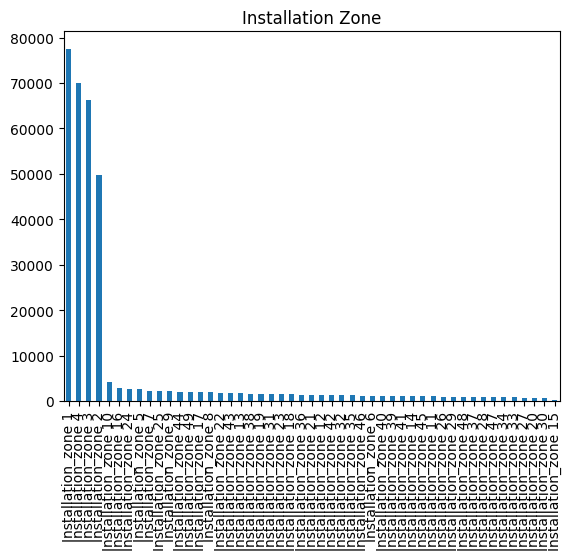

In [11]:
water_consumption.Installation_zone.value_counts().plot(kind='bar', title="Installation Zone")

In this figure, we can observe that the zones are also imbalanced.

In [12]:
water_zone = water_consumption.groupby(['Installation_zone'])
water_zone = water_zone['Consumption'].mean()
water_zone = water_zone.reset_index()

water_zone.head(10)

,Installation_zone,Consumption
0,Installation_zone 1,6.977282
1,Installation_zone 10,5.884588
2,Installation_zone 11,5.623031
3,Installation_zone 12,5.593382
4,Installation_zone 13,4.497938
5,Installation_zone 14,5.443082
6,Installation_zone 15,3.862222
7,Installation_zone 16,6.594556
8,Installation_zone 17,3.648510
9,Installation_zone 18,4.208361


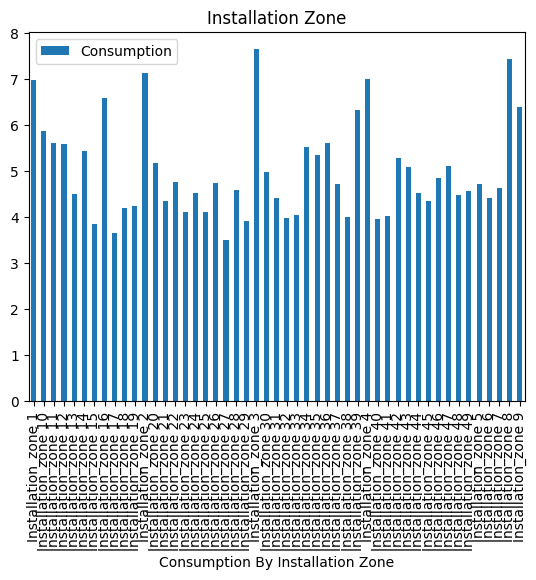

In [13]:
ax = water_zone.plot(kind='bar', title="Installation Zone")
ax = ax.set_xticklabels(water_zone.Installation_zone, rotation=90)

plt.xlabel('Consumption By Installation Zone')

plt.show()

The consumption across the zones ranges from 3 to 8.

### The evolution of consumption over the years

In [14]:
water_dates = water_consumption.groupby(['Year', 'Month'])
water_dates = water_dates['Consumption'].sum()
water_dates = water_dates.reset_index()

In [15]:
def plot_consumption_evolution(water_consumption):
    """
    Plots the consumption evolution over months for different years.

    Parameters:
    - water_consumption: DataFrame containing columns 'Year', 'Month', and 'Consumption'.
    """
    plt.figure(figsize=(10, 6))

    for year in water_consumption['Year'].unique():
        water_year = water_consumption[water_consumption['Year'] == year]
        plt.plot(water_year['Month'], water_year['Consumption'], marker='o', label=f'Year {year}')

    plt.xlabel('Month')
    plt.ylabel('Total value')
    plt.xticks(water_consumption['Month'].unique())
    plt.legend()
    plt.title('Consumption evolution (total)')
    plt.show()

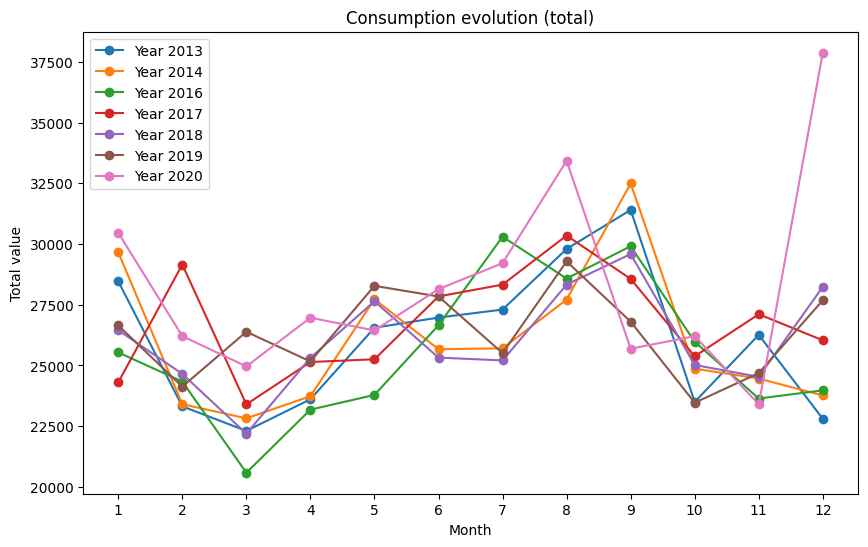

In [16]:
plot_consumption_evolution(water_dates)

As expected, consumption varies throughout the months, with certain months experiencing an increase in consumption. Therefore, it is crucial to take into account the month we are in to determine consumption.

# Repetition

**Are there users who have changed their zone or category over the years?**

In [17]:
repetition = water_consumption.groupby('Consumer_number').agg({'Installation_zone': 'nunique', 'Consumer_type': 'nunique'})
repetition.head(10)

,Installation_zone,Consumer_type
Consumer_number,,
AABH19026729995402,1,1
AABK96307399687530,1,1
AABP15829373762695,1,1
AABU83206956615238,1,1
AACK80576350114306,1,1
AACM38974282265332,1,1
AADB02534023128621,1,1
AADD80167034367129,1,1
AAET76171415183608,1,1


Users with two installation zones:

In [18]:
repetition[repetition['Installation_zone'] != 1]

,Installation_zone,Consumer_type
Consumer_number,,
BHSW58845519265702,2,1
BSDP98709407046701,2,1
CFSJ18172140084526,2,1
HNZA43401522227119,2,2
WZCS67025215181054,2,1


In [19]:
water_consumption_user =  water_consumption[water_consumption['Consumer_number'] == 'BHSW58845519265702']
water_consumption_user

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
7894,2013,2,construction,0,BHSW58845519265702,Installation_zone 4
15662,2013,4,construction,2,BHSW58845519265702,Installation_zone 4
30777,2013,8,construction,7,BHSW58845519265702,Installation_zone 4
53708,2014,2,construction,4,BHSW58845519265702,Installation_zone 4
149768,2017,3,construction,11,BHSW58845519265702,Installation_zone 4
161257,2017,6,construction,6,BHSW58845519265702,Installation_zone 4
176449,2017,10,construction,7,BHSW58845519265702,Installation_zone 4
184030,2017,12,construction,7,BHSW58845519265702,Installation_zone 4
231188,2018,12,construction,23,BHSW58845519265702,Installation_zone 4
251786,2019,5,construction,36,BHSW58845519265702,Installation_zone 39


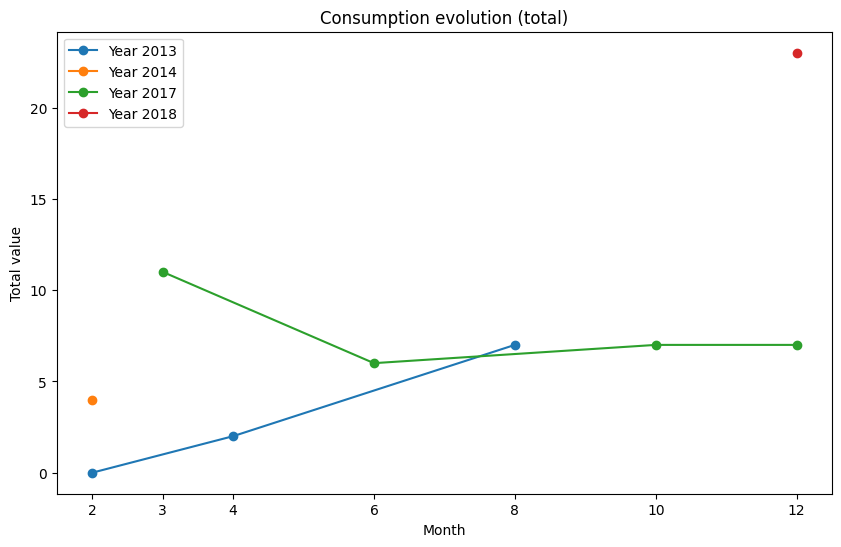

In [20]:
water_consumption_user_domestic = water_consumption_user[water_consumption_user['Installation_zone'] == 'Installation_zone 4']
water_consumption_user_domestic = water_consumption_user_domestic[water_consumption_user_domestic['Consumer_type'] == 'construction']

plot_consumption_evolution(water_consumption_user_domestic)

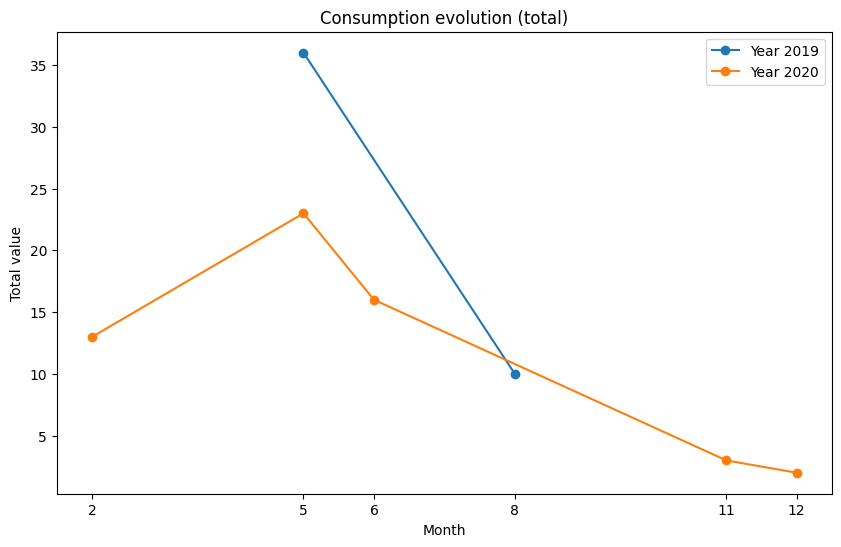

In [21]:
water_consumption_user_domestic = water_consumption_user[water_consumption_user['Installation_zone'] == 'Installation_zone 39']
water_consumption_user_domestic = water_consumption_user_domestic[water_consumption_user_domestic['Consumer_type'] == 'construction']

plot_consumption_evolution(water_consumption_user_domestic)

Users with two consumer type:

In [22]:
repetition[repetition['Consumer_type'] != 1]

,Installation_zone,Consumer_type
Consumer_number,,
ABQN51363902836566,1,2
ABXI27042109759915,1,2
AHAV14287705487496,1,2
AJKB46444750490666,1,2
AJTB65706957169564,1,2
...,...,...
ZTXB62277071332927,1,2
ZUGZ15988493358322,1,2
ZVPB30380703049294,1,2


In [23]:
water_consumption_user = water_consumption[water_consumption['Consumer_number'] == 'ABQN51363902836566']
water_consumption_user

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
265164,2019,9,domestic,6,ABQN51363902836566,Installation_zone 2
285822,2020,2,low income families,7,ABQN51363902836566,Installation_zone 2
301720,2020,6,low income families,10,ABQN51363902836566,Installation_zone 2
309465,2020,8,low income families,9,ABQN51363902836566,Installation_zone 2
317279,2020,10,low income families,10,ABQN51363902836566,Installation_zone 2
321124,2020,11,low income families,6,ABQN51363902836566,Installation_zone 2


Watching the repetitions both in the categories and in the areas of a user, perhaps it's a good option to treat them individually, using the different temporal records independently based on their category/ consumption area since, as these change, their consumption can vary significantly.

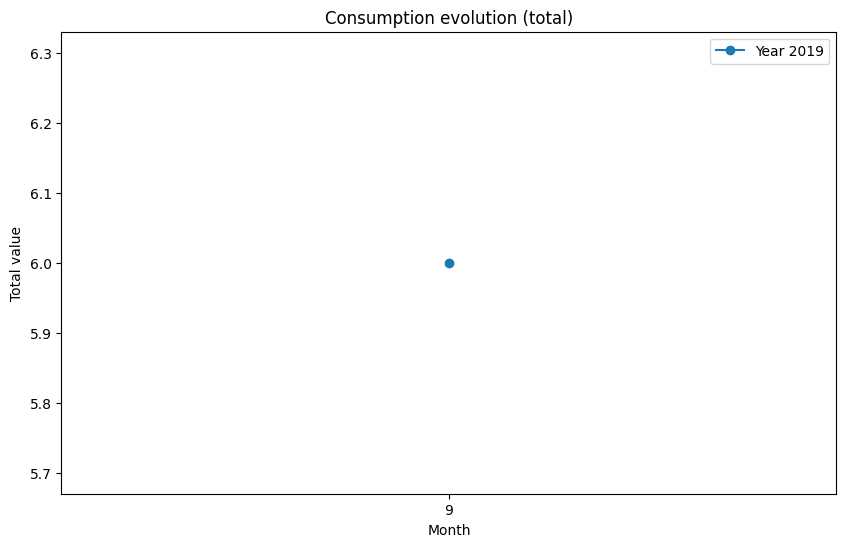

In [24]:
water_consumption_user_domestic = water_consumption_user[water_consumption_user['Installation_zone'] == 'Installation_zone 2']
water_consumption_user_domestic = water_consumption_user_domestic[water_consumption_user_domestic['Consumer_type'] == 'domestic']

plot_consumption_evolution(water_consumption_user_domestic)

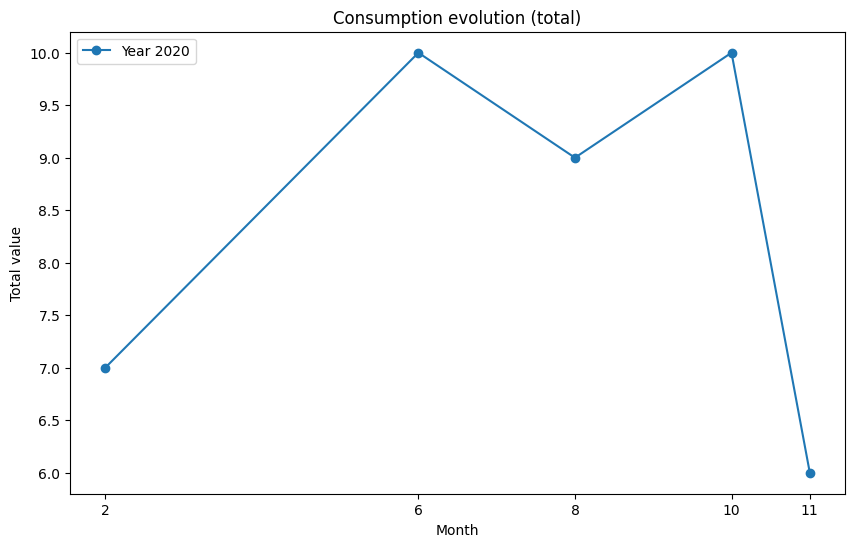

In [25]:
water_consumption_user_domestic = water_consumption_user[water_consumption_user['Installation_zone'] == 'Installation_zone 2']
water_consumption_user_domestic = water_consumption_user_domestic[water_consumption_user_domestic['Consumer_type'] == 'low income families']
plot_consumption_evolution(water_consumption_user_domestic)